In [36]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from imblearn.over_sampling import SMOTE


In [37]:
# Path to local CSV file
file_path = 'Mushrooms.data.csv'

# Column names as per the dataset provided
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
    'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]

# Load the dataset (with proper column names if the file doesn't include them)
df = pd.read_csv(file_path, sep=',', names=column_names, header=None)

# Display basic information about the dataset
df.info()

# Display the first few rows of the dataset
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8125 entries, 0 to 8124
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8125 non-null   object
 1   cap-shape                 8125 non-null   object
 2   cap-surface               8125 non-null   object
 3   cap-color                 8125 non-null   object
 4   bruises                   8125 non-null   object
 5   odor                      8125 non-null   object
 6   gill-attachment           8125 non-null   object
 7   gill-spacing              8125 non-null   object
 8   gill-size                 8125 non-null   object
 9   gill-color                8125 non-null   object
 10  stalk-shape               8125 non-null   object
 11  stalk-root                8125 non-null   object
 12  stalk-surface-above-ring  8125 non-null   object
 13  stalk-surface-below-ring  8125 non-null   object
 14  stalk-color-above-ring  

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-\r\nbelow-ring,stalk-color-\r\nabove-ring,stalk-color-\r\nbelow-ring,veil-type,veil-color,ring-number,ring-type,spore-print-\r\ncolor,population,habitat
1,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
2,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
3,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
4,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u


In [38]:
# Clean the 'class' column if necessary (standardizing 'poisonous' -> 'p' and 'edible' -> 'e')
df['class'] = df['class'].replace({'poisonous': 'p', 'edible': 'e'})

# Check the unique values in the 'class' column
print(df['class'].unique())

# Check if there are any missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

# Handle missing values by filling with mode
df = df.apply(lambda col: col.fillna(col.mode()[0]))



['p' 'e']
Missing values per column:
Series([], dtype: int64)


## Class Distribution (Edible vs Poisonous)
The plot below shows the distribution of the two classes in the dataset: edible and poisonous mushrooms. This visualization helps to understand the balance between the two classes, which is crucial for model training. An imbalanced dataset can lead to biased models, thus identifying the class distribution is an important step.


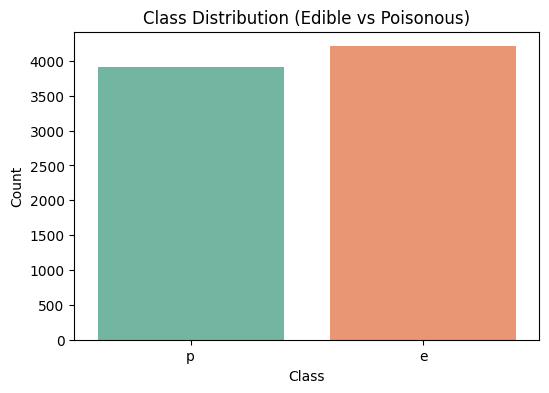

class
e    4208
p    3917
Name: count, dtype: int64


In [39]:
# 1. **Class Distribution (Edible vs Poisonous)**
# Class distribution (edible vs poisonous)
class_distribution = df['class'].value_counts()

# Plotting the class distribution (Edible vs Poisonous)
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, hue='class', palette="Set2", legend=False)
plt.title('Class Distribution (Edible vs Poisonous)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Display the class distribution count
print(class_distribution)


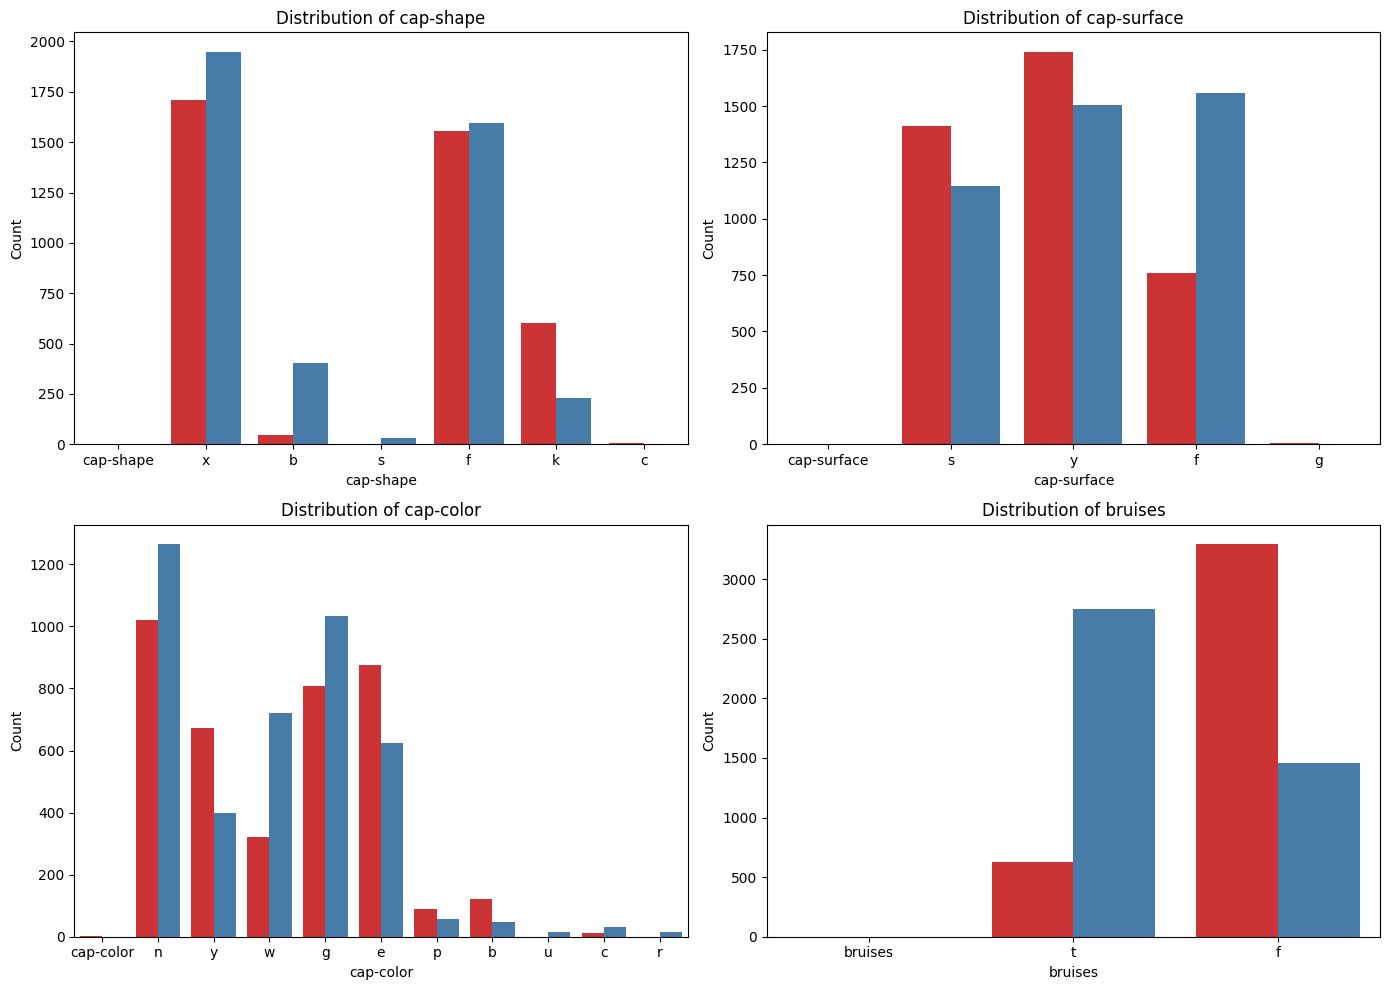

In [40]:
# Plot the distribution of the first few categorical features (to understand their distribution)
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns[1:5]):  # Plotting the first 4 columns
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=column, data=df, hue='class', palette="Set1", legend=False)  # Updated line
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [41]:
# 4. **Calculate Point-Biserial Correlation between Features and Target (Class)**
# Convert target ('class') to binary values (1 for poisonous, 0 for edible)
df['class'] = df['class'].map({'p': 1, 'e': 0})

# Calculate point-biserial correlation for each feature with the target variable
correlations = []
for column in df.columns[1:]:  # Skip the target column ('class')
    # Encode each categorical feature using one-hot encoding
    feature = pd.get_dummies(df[column], drop_first=True)  # One-hot encoding
    for col in feature.columns:
        # Calculate the point-biserial correlation between the target and feature
        corr, _ = pointbiserialr(df['class'], feature[col])  # Point-biserial correlation
        correlations.append((column, col, corr))

# Convert the list of correlations to a DataFrame for easier viewing
corr_df = pd.DataFrame(correlations, columns=['Feature', 'Encoded Feature', 'Correlation'])

# Sort correlations by absolute value of correlation to get the most important ones
corr_df = corr_df.sort_values(by='Correlation', ascending=False)

# Display the top correlated features
print("Top Correlations with Target (Poisonous Mushroom):")
print(corr_df.head())


Top Correlations with Target (Poisonous Mushroom):
                     Feature Encoded Feature  Correlation
23                      odor               f     0.623710
56  stalk-surface-above-ring               k     0.587523
60  stalk-surface-below-ring               k     0.573392
36                 gill-size               n     0.539888
20                   bruises               f     0.501303


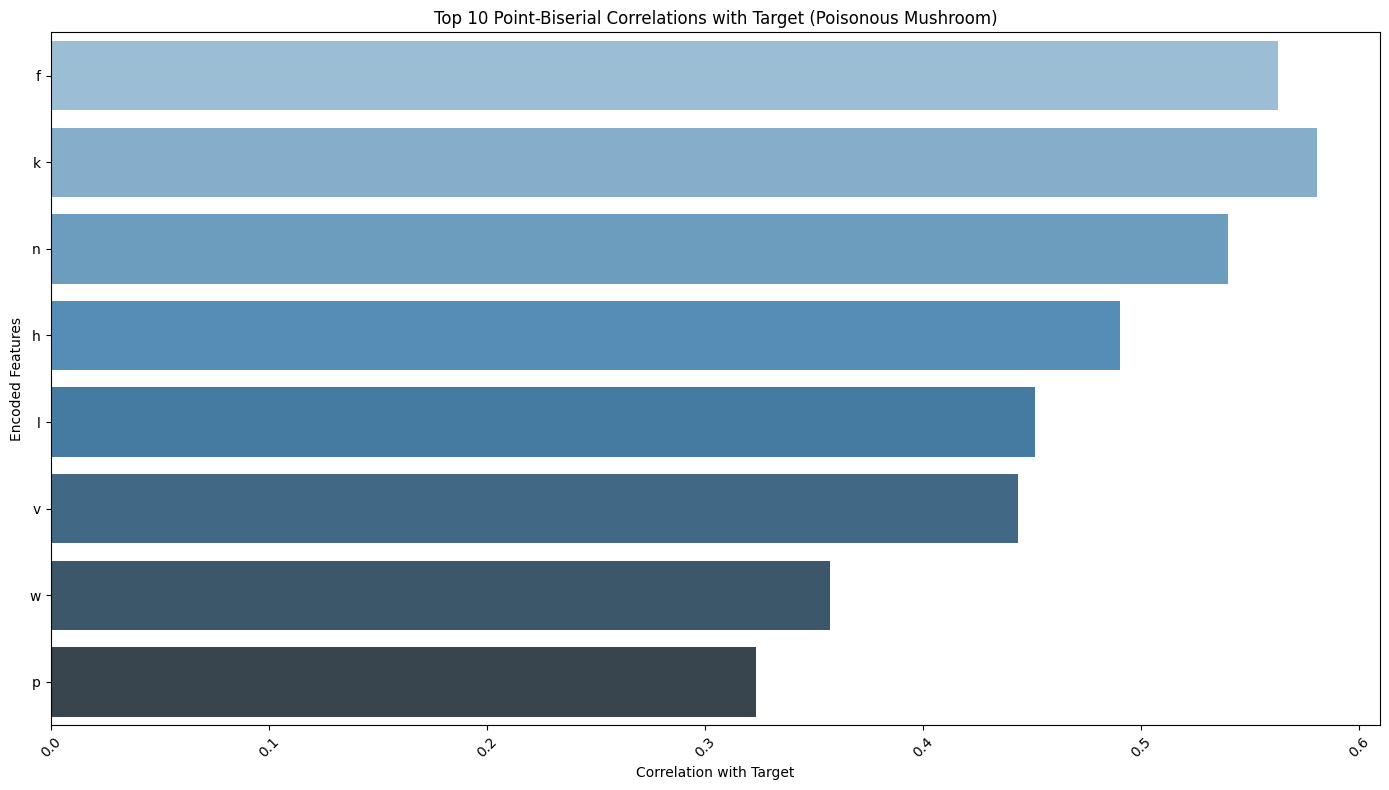

In [42]:
# 5. # Plotting the top 10 correlations with the target variable (Poisonous Mushroom)
top_corr_df = corr_df.head(10)  # Select top 10 most correlated features

plt.figure(figsize=(14, 8))  # Increase plot size for better readability
sns.barplot(x='Correlation', y='Encoded Feature', data=top_corr_df, hue='Encoded Feature', palette='Blues_d', dodge=False, errorbar=None, legend=False)
plt.title('Top 10 Point-Biserial Correlations with Target (Poisonous Mushroom)')
plt.xlabel('Correlation with Target')
plt.ylabel('Encoded Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

) missing from font(s) DejaVu Sans.ms\Python\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from font(s) DejaVu Sans.on\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


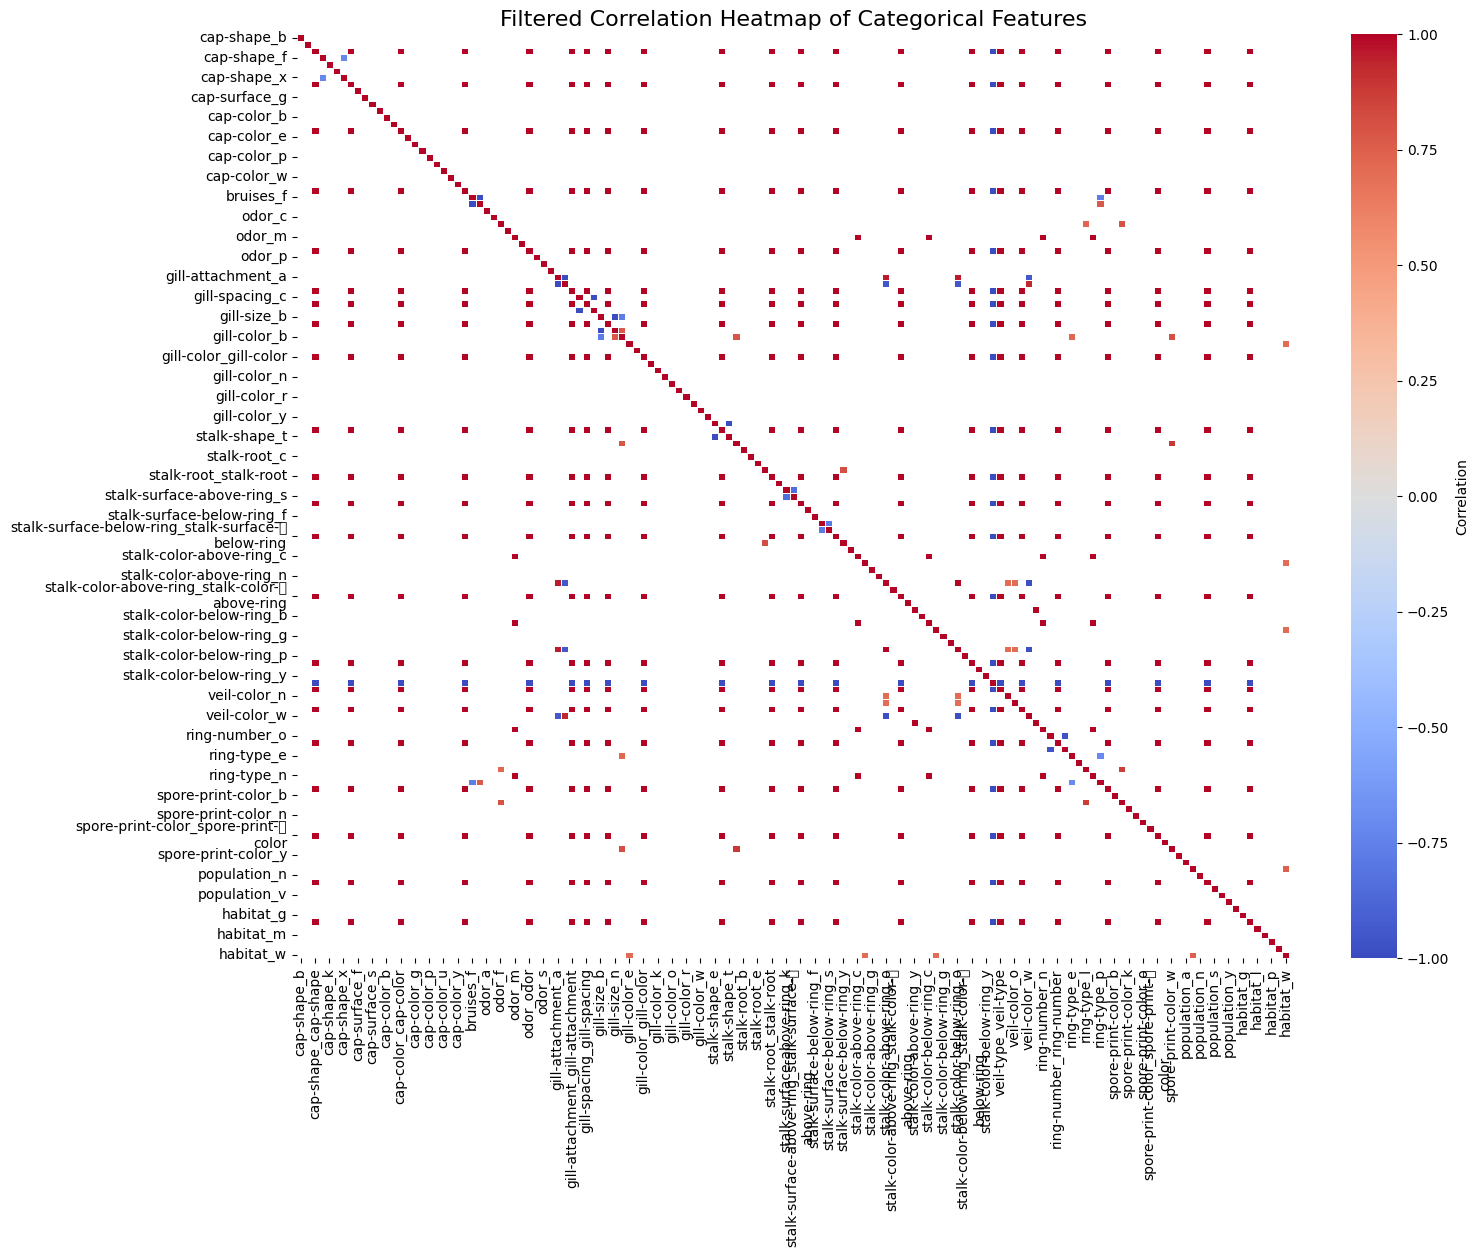

In [43]:
# 6. # Generate a heatmap for feature correlations (using one-hot encoded variables)
df_dummies = pd.get_dummies(df.drop('class', axis=1))

# Calculate the correlation matrix
corr_matrix = df_dummies.corr()

# Filter the correlation matrix to only include strong correlations (above a threshold)
threshold = 0.7
strong_corr_matrix = corr_matrix[corr_matrix.abs() > threshold]

# Set up the figure size for better readability
plt.figure(figsize=(16, 12))

# Generate the heatmap with annotations disabled and a clearer color scheme
sns.heatmap(strong_corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", cbar_kws={'label': 'Correlation'}, linewidths=0.5)
plt.title('Filtered Correlation Heatmap of Categorical Features', fontsize=16)
plt.show()

In [45]:
# Ensure all features are numeric and properly encoded before SMOTE
# Convert categorical features to one-hot encoded variables
X = pd.get_dummies(df.drop('class', axis=1), drop_first=True)
y = df['class']

# Convert any boolean columns to integers
X = X.astype(int)

# Verify the encoding
print(X.head())
print(y.head())

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the resampled class distribution
print(pd.Series(y_resampled).value_counts())



   cap-shape_c  cap-shape_cap-shape  cap-shape_f  cap-shape_k  cap-shape_s  \
0            0                    1            0            0            0   
1            0                    0            0            0            0   
2            0                    0            0            0            0   
3            0                    0            0            0            0   
4            0                    0            0            0            0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0            0              0              0              0              0   
1            1              0              0              1              0   
2            1              0              0              1              0   
3            0              0              0              1              0   
4            1              0              0              0              1   

   ...  population_s  population_v  population_y  habitat_g  h